In [1]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
  train_test_split(perch_length, perch_weight, random_state=42)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [4]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

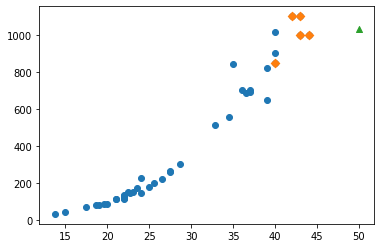

In [7]:
import matplotlib.pyplot as plt 
# 50cm 농어의 이웃
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트 산점도
plt.scatter(train_input, train_target)
# 훈련 세트 중 이웃 샘플만 다시 그린다.
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터 => 훈련세트 범위 밖의 데이터 추정하기가 어렵다.
plt.scatter(50, 1033, marker='^')
plt.show()

In [12]:
# 선형 회귀 = Linear Regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
# 훈련
lr.fit(train_input, train_target)

# 예측
print(lr.predict([[50]]))

# 기울기, y절편
print(lr.coef_, lr.intercept_)

[1241.83860323]
[39.01714496] -709.0186449535477


0.939846333997604
0.8247503123313558


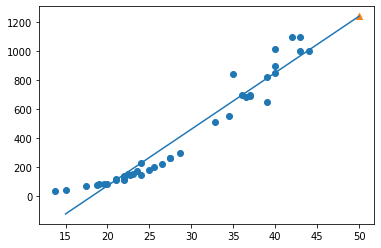

In [16]:
# 학습한 직선 그리기
plt.scatter(train_input, train_target)

# 1차 방정식 그래프
plt.plot([15, 50], [15*lr.coef_+lr.intercept_,  50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')

print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

In [18]:
# 다항 회귀

train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))
print(lr.coef_, lr.intercept_)

[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827


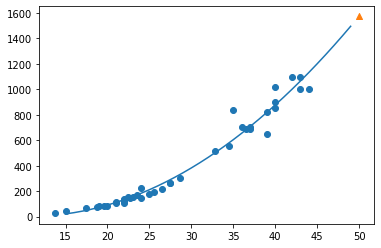

0.9706807451768623
0.9775935108325122


In [22]:
# 학습한 직선 그리기
point = np.arange(15, 50)
plt.scatter(train_input, train_target)
plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_)

# 50cm 농어 데이터
plt.scatter(50, 1574, marker='^')
plt.show()

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))